In [21]:
# import packages
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
#load data from csv file
waterlevel = pd.read_csv('data/water_level.csv')
#format the datatype
waterlevel['date'] = waterlevel['date'].astype('datetime64[ns]')
waterlevel.set_index('date',inplace = True)
waterlevel.head()

,Upstream_water_level
date,
2015-01-01,171.44
2015-01-02,171.42
2015-01-03,171.38
2015-01-04,171.28
2015-01-05,171.17


In [10]:
#divide the dataset into train and test
date1 = datetime.datetime(2019, 1, 1) 
train = waterlevel[waterlevel.index<date1]
test = waterlevel[waterlevel.index>=date1]

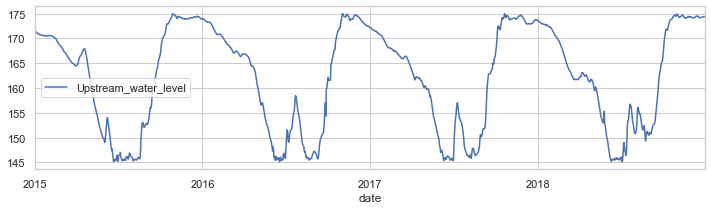

In [11]:
#plot the historical picture for train data
train.plot(figsize=(12,3))

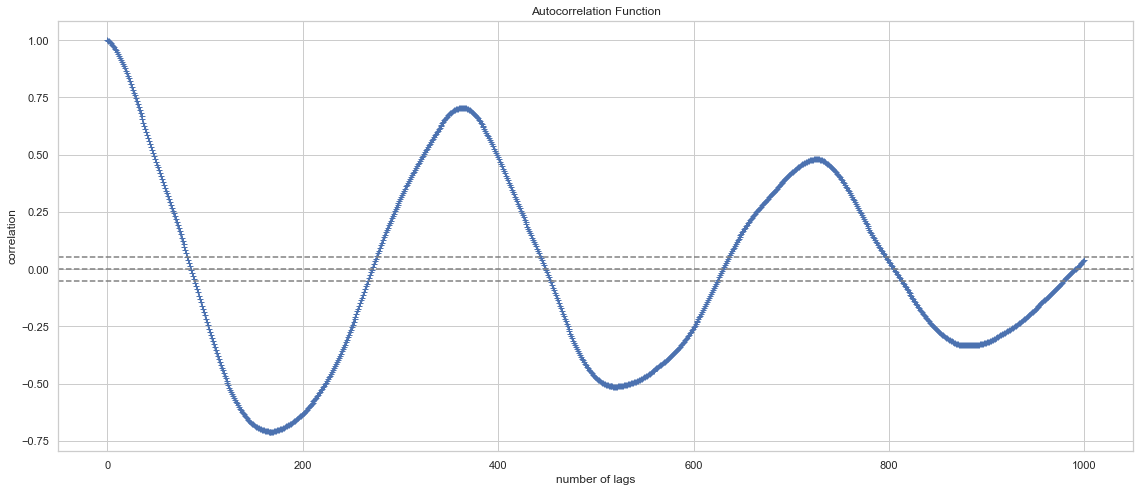

In [12]:
#calling auto correlation function
lag_acf = acf(train, nlags=1000)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

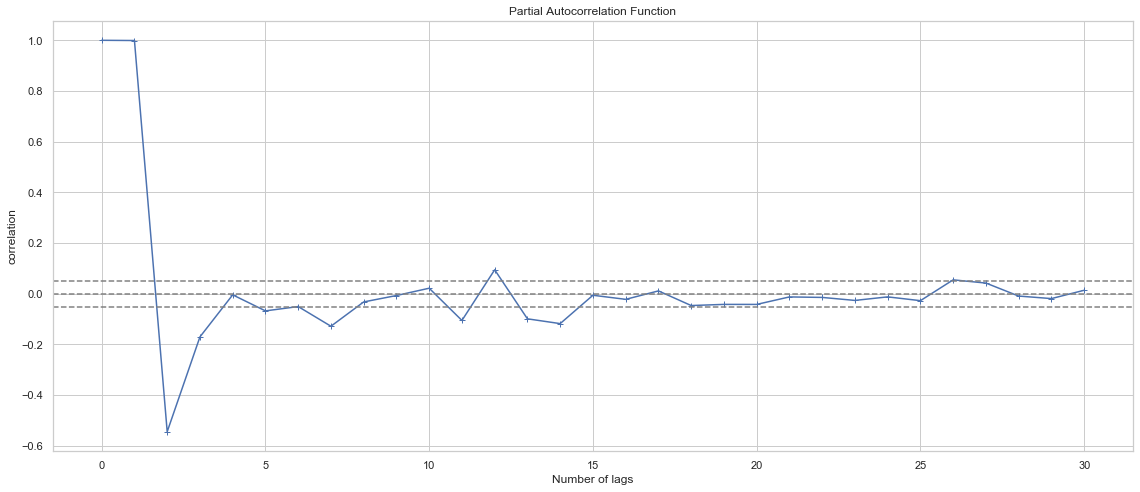

In [13]:
#calling partial correlation function
lag_pacf = pacf(train, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

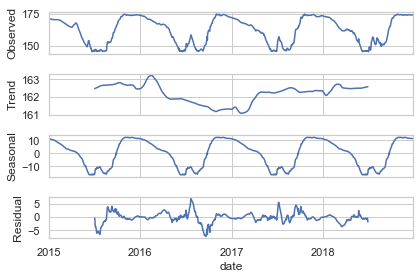

In [14]:
# Reproduce the example in OP
result = seasonal_decompose(train, model='additive', freq=365)
result.plot()
pyplot.show()

                             OLS Regression Results                             
Dep. Variable:     Upstream_water_level   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     4.081
Date:                  Thu, 19 Dec 2019   Prob (F-statistic):             0.0436
Time:                          15:10:44   Log-Likelihood:                -831.98
No. Observations:                  1097   AIC:                             1668.
Df Residuals:                      1095   BIC:                             1678.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.2386      0.031

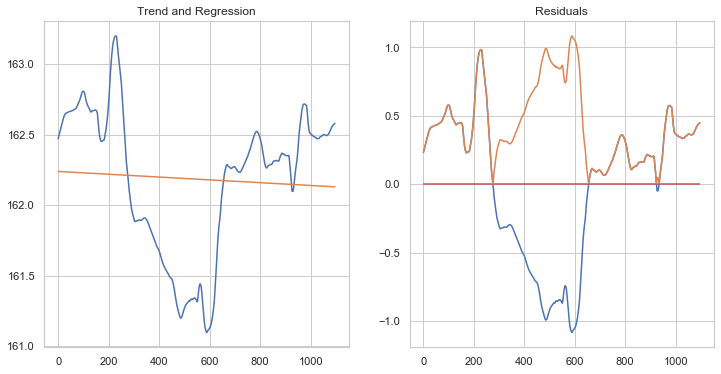

In [15]:
#Apply OLS Regression to test the the trend and residuals
x, y = np.arange(len(result.trend.dropna())), result.trend.dropna()
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())
fig, ax = plt.subplots(1, 2, figsize=(12,6));
ax[0].plot(result.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(result.trend.dropna()))])
ax[0].set_title("Trend and Regression");
ax[1].plot(res.resid.values);
ax[1].plot(np.abs(res.resid.values));
ax[1].hlines(0, 0, len(res.resid), color='r');
ax[1].set_title("Residuals");

/Users/henanli/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/henanli/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


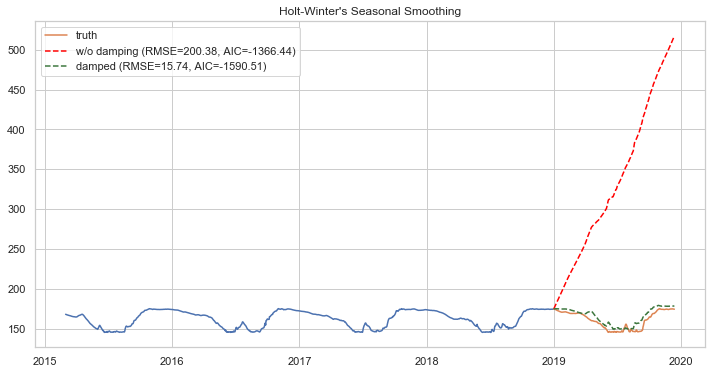

In [20]:
#Holt-Winter's Seansonal Smoothing damping or damped
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365, damped=True)
fit = model.fit()
pred = fit.forecast(347)
fit2 = model2.fit()
pred2 = fit2.forecast(347)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='red', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

In [60]:
sarima_pred = sarima_fit.get_prediction("2019-01-01", "2019-12-13")

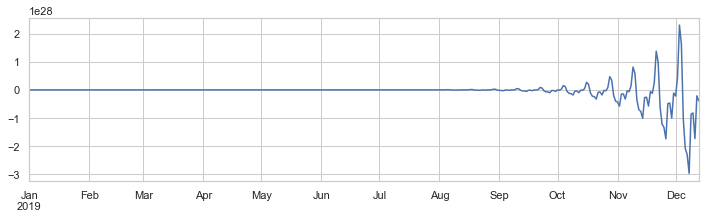

In [61]:
sarima_pred.predicted_mean.plot(figsize=(12,3))

In [37]:
sarima_pred.predicted_mean

2019-01-01    2.178817e-01
2019-01-02    2.484291e-01
2019-01-03    2.678756e-01
2019-01-04    2.784047e-01
2019-01-05    2.819562e-01
                  ...     
2019-12-09    1.004220e-20
2019-12-10    9.374714e-21
2019-12-11    8.713265e-21
2019-12-12    8.067110e-21
2019-12-13    7.443075e-21
Freq: D, Length: 347, dtype: float64

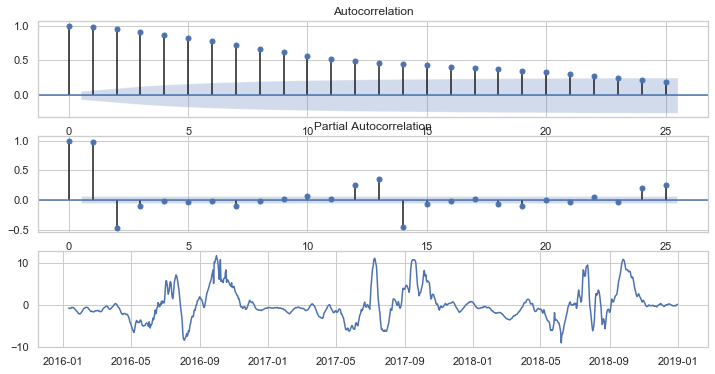

In [19]:
# Stationary data
station =train-train.rolling(365).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (station.dropna() - station.dropna().shift(12)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=25)
ax[1] = plot_pacf(x, ax=ax[1], lags=25)
ax[2].plot(x)

In [17]:
station =train-train.rolling(365).mean()

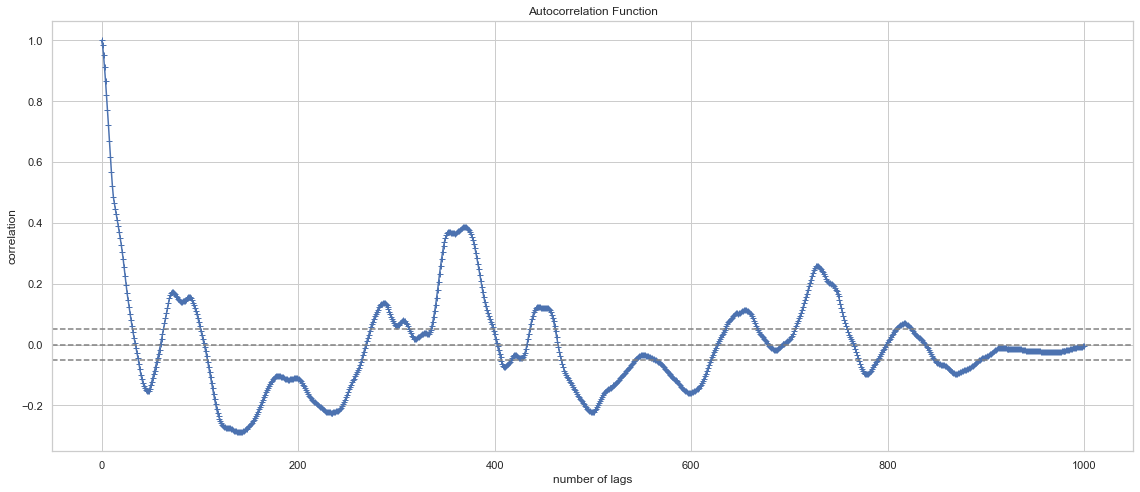

In [142]:
#calling auto correlation function
lag_acf = acf(x, nlags=1000)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

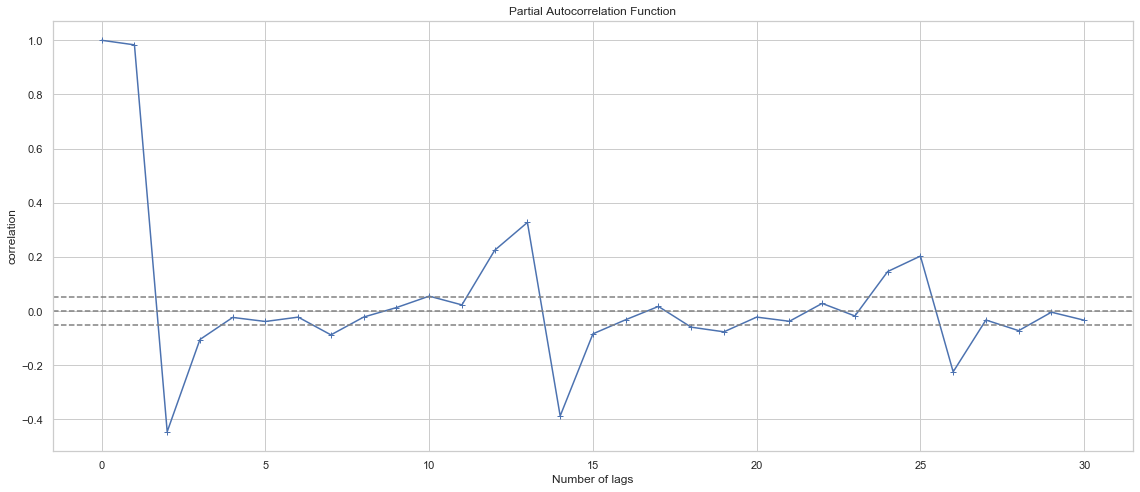

In [143]:
#calling partial correlation function
lag_pacf = pacf(x, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# sarima_model = SARIMAX(train, order=(3, 0, 2), seasonal_order=(0, 1, 1,365),\
#                        enforce_invertibility=False, enforce_stationarity=False)
# sarima_fit = sarima_model.fit()
# sarima_pred = sarima_fit.get_prediction("2019-01-01", "2019-12-13")
# predicted_means = p.predicted_mean + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
# predicted_intervals = p.conf_int(alpha=0.05)
# lower_bounds = predicted_intervals['lower station'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
# upper_bounds = predicted_intervals['upper station'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values

# sarima_rmse = np.sqrt(np.mean(np.square(test_st.values - p.predicted_mean.values)))

# fig, ax = plt.subplots(figsize=(12, 4))
# ax.plot(df.data.index[100:-24], df.data.values[100:-24]);
# ax.plot(test_st.index, test_st.values + df.data.iloc[-36:-1].rolling(12).mean().dropna().values, label='truth');
# ax.plot(test_st.index, predicted_means, color='#ff7823', linestyle='--', label="prediction (RMSE={:0.2f})".format(sarima_rmse));
# ax.fill_between(test_st.index, lower_bounds, upper_bounds, color='#ff7823', alpha=0.3, label="confidence interval (95%)");
# ax.legend();
# ax.set_title("SARIMA");